Pablo Chaves Tabares

Universidad Nacional De Colombia

Red Profunda y amplia 



Sobre una base de datos de desercion, se debe entrenar un sistema de redes neuronales artificial para predecir si el estudiante va desertar.

# Lectura

In [ ]:
FILEID = "1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
import pandas as pd
Xtrain = pd.read_excel('DesercionUTP/Train.xlsx')
Xtest = pd.read_excel('DesercionUTP/Test.xlsx')
Xtrain.head()


--2020-07-15 20:23:22--  https://docs.google.com/uc?export=download&confirm=&id=1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE
Resolving docs.google.com (docs.google.com)... 64.233.188.138, 64.233.188.100, 64.233.188.102, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/7q9g2c1pdpv8fq8rb2b5abt2no43b44t/5t230rdns6n4alvmt1gv6bakkv589iqp/1594844550000/09173029842254050324/16597713413555775558Z/1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE?e=download [following]
--2020-07-15 20:23:23--  https://doc-0s-6k-docs.googleusercontent.com/docs/securesc/7q9g2c1pdpv8fq8rb2b5abt2no43b44t/5t230rdns6n4alvmt1gv6bakkv589iqp/1594844550000/09173029842254050324/16597713413555775558Z/1AefUTs3v3x4Tl4r7-CbfyBFQNHqntNqE?e=download
Resolving doc-0s-6k-docs.googleusercontent.com (doc-0s-6k-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to 

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2018-2,18,0,2,0,237.00,486401.00,-2.4,3.1,-3.2,-4.9,50,39,0,2,0,0,5,0,0,3,0,6,0,1,0,0,1
1,2018-1,19,0,2,0,315.00,654797.61,-3.3,1.4,-4.3,-0.2,79,58,2,6,0,0,0,0,3,5,0,0,1,0,0,0,1
2,2018-2,20,1,3,0,244.00,1944582.00,0.0,0.0,0.0,0.0,33,28,2,10,2,11,0,0,0,2,0,3,0,0,1,0,0
3,2019-1,24,1,1,0,43.25,271560.00,3.1,2.7,2.5,-2.0,36,31,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,2018-1,23,1,2,0,261.00,415039.58,-1.0,1.1,-2.6,-8.6,26,28,4,3,3,0,0,2,4,10,0,3,0,0,0,1,1


# Analisis Exploratorio

In [ ]:
Xtest.head()

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,2018-2,22,1,1,0,332.00,271560.0,1.9,-0.3,-3.8,-6.0,40,35,3,6,5,3,3,8,3,3,0,3,0,0,0,1,1
1,2018-2,18,0,2,0,337.00,486401.0,-1.1,2.5,-5.2,-2.9,33,32,0,9,0,0,5,5,9,2,0,2,0,1,0,0,0
2,2019-1,22,0,2,0,50.52,486401.0,0.0,0.0,0.0,0.0,49,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,2017-2,20,0,2,0,286.00,451925.0,-0.1,1.7,-3.1,-0.9,46,34,0,3,0,3,0,0,0,0,7,0,0,1,0,0,0
4,2019-1,19,1,1,0,198.00,2244112.0,3.7,1.7,-0.2,0.0,48,33,0,6,0,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
print("Dimensiones de test:", Xtest.shape)
print("Dimensiones de train:", Xtrain.shape)

Dimensiones de test: (1150, 28)
Dimensiones de train: (4600, 28)


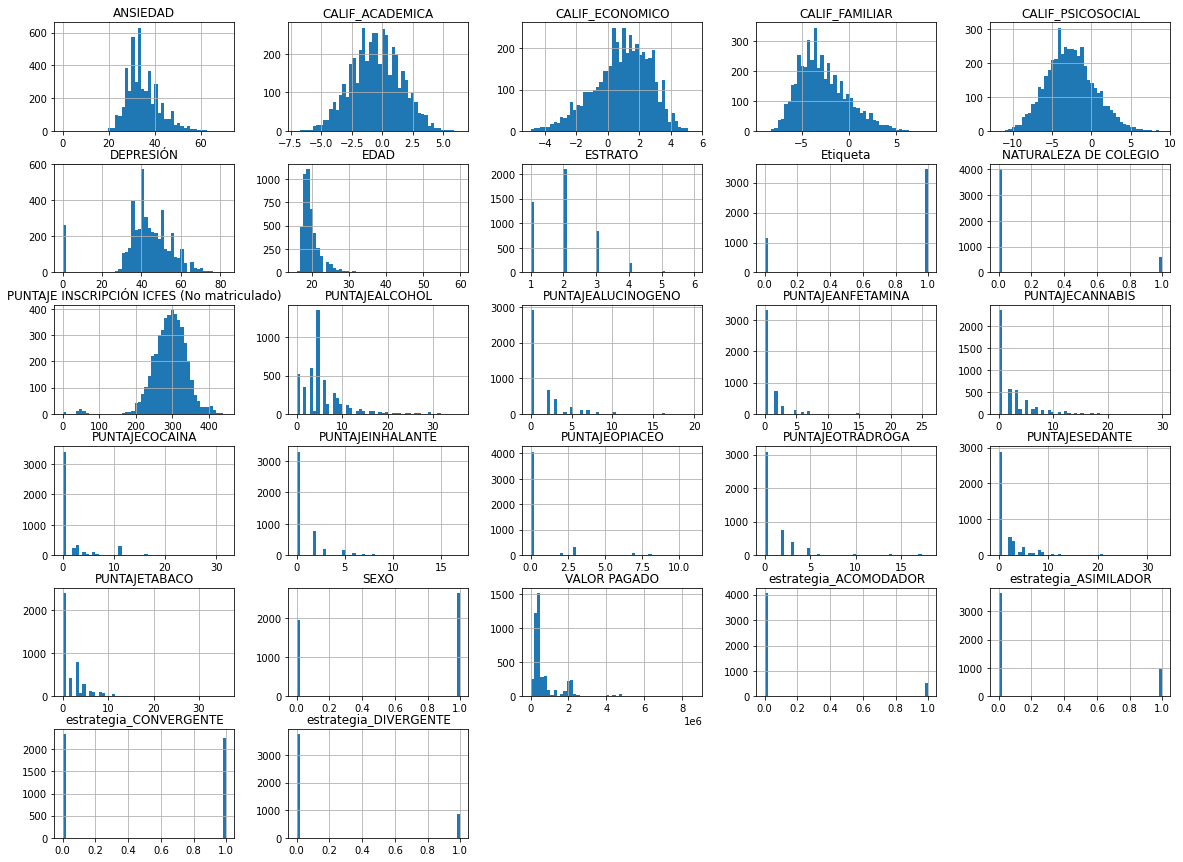

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Xtrain.hist(bins=50, figsize=(20,15))
plt.show()

# Analisis estadistico

In [ ]:
Xtrain.describe()

,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.00000,4600.000000
mean,19.933261,0.574783,1.988696,0.128043,292.913667,7.950010e+05,-0.485957,0.903891,-2.730957,-2.668304,42.776522,34.973261,2.31500,5.967826,2.508913,1.517391,0.976739,0.953913,1.883043,1.450217,0.456522,1.169348,0.116087,0.207609,0.491304,0.18500,0.751739
std,3.092490,0.494430,0.879004,0.334175,48.550903,9.479895e+05,2.008979,1.787336,2.608343,3.036601,13.749382,7.081634,3.55886,4.972358,3.739089,3.282410,2.147553,1.964472,3.544427,2.515211,1.442626,2.396411,0.320364,0.405639,0.499979,0.38834,0.432051
min,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,-7.000000,-4.900000,-8.900000,-11.800000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,18.000000,0.000000,1.000000,0.000000,266.362500,2.715600e+05,-1.900000,-0.200000,-4.600000,-4.800000,38.000000,30.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,19.000000,1.000000,2.000000,0.000000,296.000000,4.519254e+05,-0.500000,1.100000,-3.200000,-2.800000,43.000000,34.000000,0.00000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,21.000000,1.000000,2.000000,0.000000,323.000000,7.274438e+05,0.900000,2.200000,-1.100000,-0.700000,50.000000,39.000000,3.00000,8.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.00000,1.000000
max,60.000000,1.000000,6.000000,1.000000,448.000000,8.642568e+06,6.400000,5.500000,8.400000,9.000000,83.000000,71.000000,36.00000,36.000000,30.000000,32.000000,26.000000,17.000000,33.000000,20.000000,11.000000,18.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# Correcion de errores y transformacion de variables

* Las etiquetas de calificacion poseen valores negativos, se asume que fueron errores por ende se saca el valor absoluto.
* El periodo esta en tipo string, se convierte a tipo numerico

In [ ]:
Xtrain[{'CALIF_PSICOSOCIAL','CALIF_FAMILIAR','CALIF_ACADEMICA','CALIF_ECONOMICO','PUNTAJECOCAINA'}].describe()

,PUNTAJECOCAINA,CALIF_PSICOSOCIAL,CALIF_ACADEMICA,CALIF_FAMILIAR,CALIF_ECONOMICO
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,1.517391,-2.668304,-0.485957,-2.730957,0.903891
std,3.282410,3.036601,2.008979,2.608343,1.787336
min,0.000000,-11.800000,-7.000000,-8.900000,-4.900000
25%,0.000000,-4.800000,-1.900000,-4.600000,-0.200000
50%,0.000000,-2.800000,-0.500000,-3.200000,1.100000
75%,2.000000,-0.700000,0.900000,-1.100000,2.200000
max,32.000000,9.000000,6.400000,8.400000,5.500000


In [ ]:
#TRAIN
#Valor absoluto 

Xtrain['CALIF_PSICOSOCIAL']=Xtrain['CALIF_PSICOSOCIAL'].abs()
Xtrain['CALIF_FAMILIAR']=Xtrain['CALIF_FAMILIAR'].abs()
Xtrain['CALIF_ACADEMICA']=Xtrain['CALIF_ACADEMICA'].abs()
Xtrain['CALIF_ECONOMICO']=Xtrain['CALIF_ECONOMICO'].abs()

#We need to change the format of the period to numerical data.
Xtrain['Periodo']=Xtrain['Periodo'].replace('2017-1','1', regex=True)
Xtrain['Periodo']=Xtrain['Periodo'].replace('2017-2','2', regex=True)
Xtrain['Periodo']=Xtrain['Periodo'].replace('2018-1','3', regex=True)
Xtrain['Periodo']=Xtrain['Periodo'].replace('2018-2','4', regex=True)
Xtrain['Periodo']=Xtrain['Periodo'].replace('2019-1','5', regex=True)
Xtrain['Periodo']=Xtrain['Periodo'].replace('2019-2','6', regex=True)
Xtrain['Periodo'].value_counts()

#TEST
#Valor absoluto 

Xtest['CALIF_PSICOSOCIAL']=Xtest['CALIF_PSICOSOCIAL'].abs()
Xtest['CALIF_FAMILIAR']=Xtest['CALIF_FAMILIAR'].abs()
Xtest['CALIF_ACADEMICA']=Xtest['CALIF_ACADEMICA'].abs()
Xtest['CALIF_ECONOMICO']=Xtest['CALIF_ECONOMICO'].abs()

#We need to change the format of the period to numerical data.
Xtest['Periodo']=Xtest['Periodo'].replace('2017-1','1', regex=True)
Xtest['Periodo']=Xtest['Periodo'].replace('2017-2','2', regex=True)
Xtest['Periodo']=Xtest['Periodo'].replace('2018-1','3', regex=True)
Xtest['Periodo']=Xtest['Periodo'].replace('2018-2','4', regex=True)
Xtest['Periodo']=Xtest['Periodo'].replace('2019-1','5', regex=True)
Xtest['Periodo']=Xtest['Periodo'].replace('2019-2','6', regex=True)
Xtest['Periodo'].value_counts()

5    324
3    283
4    212
1    187
2    144
Name: Periodo, dtype: int64

# Preproceso

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.manifold import TSNE

# Se obtienen las etiquetas de salida
ytrain = Xtrain["Etiqueta"].copy()
ytest  = Xtest["Etiqueta"].copy()

Scalertrain=StandardScaler() 
Scalertest=StandardScaler() 
Scalertrain.fit(Xtrain)
Scalertest.fit(Xtest)
Xtrain.loc[:,:]=Scalertrain.transform(Xtrain)
Xtest.loc[:,:]=Scalertrain.transform(Xtest)

#Se inserta nuevamente la etiqueta de salida (Ya que el escalador la dañó)
Xtrain['Etiqueta']=ytrain
Xtest['Etiqueta']=ytest

Xtrain['Etiqueta'].head()

0    1
1    1
2    0
3    1
4    1
Name: Etiqueta, dtype: int64

# Muestra de Datos preprocesados

In [ ]:
Xtrain.head()

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
0,0.453237,-0.625215,-1.162643,0.012862,-0.383205,-1.151776,-0.325566,0.600062,1.296585,-0.045915,0.685515,0.525425,0.568679,-0.650560,-0.798064,-0.671069,-0.462330,1.873620,-0.485635,-0.531327,0.616231,-0.316486,2.016005,-0.362399,1.953651,-0.982757,-0.476439,1
1,-0.277791,-0.301816,-1.162643,0.012862,-0.383205,0.454960,-0.147912,1.336531,-0.248498,0.544959,-1.423372,2.634840,3.251968,-0.088521,0.006471,-0.671069,-0.462330,-0.454864,-0.485635,0.315165,1.411479,-0.316486,-0.488011,2.759390,-0.511862,-0.982757,-0.476439,1
2,0.453237,0.021583,0.860109,1.150636,-0.383205,-1.007581,1.212783,-1.363855,-1.520919,-1.764824,-1.513112,-0.711129,-0.984804,-0.088521,0.811006,-0.136121,2.889231,-0.454864,-0.485635,-0.531327,0.218607,-0.316486,0.763997,-0.362399,-0.511862,1.017545,-0.476439,0
3,1.184265,1.315180,0.860109,-1.124913,-0.383205,-5.142866,-0.552219,1.172871,0.933036,-0.421927,-0.615713,-0.492914,-0.561127,-0.650560,-1.200331,-0.671069,-0.462330,-0.454864,-0.485635,-0.531327,-0.576641,-0.316486,-0.488011,-0.362399,-0.511862,1.017545,-0.476439,1
4,-0.277791,0.991781,0.860109,0.012862,-0.383205,-0.657395,-0.400851,-0.545556,-0.521159,-0.368211,2.345703,-1.220298,-0.984804,0.473518,-0.596930,0.131353,-0.462330,-0.454864,0.532561,0.597328,3.399600,-0.316486,0.763997,-0.362399,-0.511862,-0.982757,2.098906,1


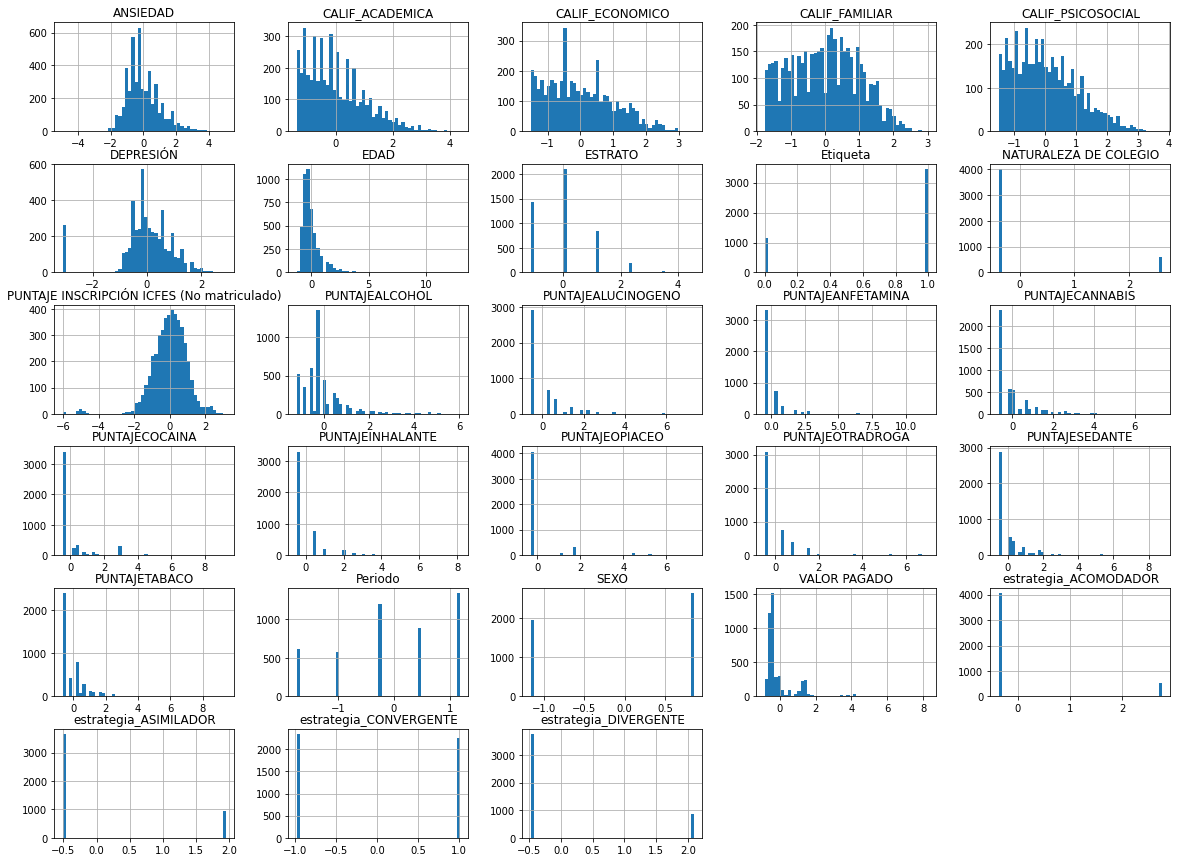

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
Xtrain.hist(bins=50, figsize=(20,15))
plt.show()

# Matriz de Correlacion y observaciones

La correlacion permite hacer inferencias a partir de los datos.
Indica la relacion lineal entre los parametros. Un valor de correlación alto y positivo indica que los elementos miden la misma característica. Si los elementos no están altamente correlacionados, entonces los elementos pueden medir diferentes características.

In [ ]:
corr_matrix = Xtrain.corr('pearson')
corr_matrix.style.background_gradient(cmap='coolwarm')

,Periodo,EDAD,SEXO,ESTRATO,NATURALEZA DE COLEGIO,PUNTAJE INSCRIPCIÓN ICFES (No matriculado),VALOR PAGADO,CALIF_ACADEMICA,CALIF_ECONOMICO,CALIF_FAMILIAR,CALIF_PSICOSOCIAL,DEPRESIÓN,ANSIEDAD,PUNTAJETABACO,PUNTAJEALCOHOL,PUNTAJECANNABIS,PUNTAJECOCAINA,PUNTAJEANFETAMINA,PUNTAJEINHALANTE,PUNTAJESEDANTE,PUNTAJEALUCINOGENO,PUNTAJEOPIACEO,PUNTAJEOTRADROGA,estrategia_ACOMODADOR,estrategia_ASIMILADOR,estrategia_CONVERGENTE,estrategia_DIVERGENTE,Etiqueta
Periodo,1.000000,-0.324470,-0.018233,-0.010892,0.029098,0.002715,0.064913,0.024671,0.011031,-0.006361,-0.050317,0.036755,0.077245,-0.021598,0.222509,-0.101913,-0.112113,-0.117180,-0.216700,-0.203514,-0.176931,-0.282370,-0.248313,-0.172607,-0.218595,0.497556,-0.269865,0.048176
EDAD,-0.324470,1.000000,0.072165,-0.019155,-0.013822,-0.313483,-0.007540,-0.026856,0.061095,-0.116336,0.092301,-0.065537,-0.118651,0.111857,-0.037075,0.080713,-0.008422,0.011553,0.029952,0.095439,0.049011,0.091295,0.053663,0.047547,0.077955,-0.176795,0.106968,-0.131692
SEXO,-0.018233,0.072165,1.000000,0.067486,0.032180,0.064929,0.026382,-0.008040,-0.052796,-0.030873,0.061571,-0.146272,-0.260843,0.074037,0.067047,0.067563,0.029612,0.028977,0.010713,-0.026771,-0.004961,-0.009159,0.003899,-0.032855,0.041288,-0.011442,-0.001291,-0.086111
ESTRATO,-0.010892,-0.019155,0.067486,1.000000,0.259571,0.116621,0.324302,0.046303,0.002274,0.118492,0.052456,-0.021079,-0.064601,-0.030001,-0.001128,-0.018030,-0.029700,-0.012119,0.004357,-0.008939,-0.020711,-0.008104,-0.044097,-0.043212,0.009633,0.022535,-0.003427,0.001769
NATURALEZA DE COLEGIO,0.029098,-0.013822,0.032180,0.259571,1.000000,0.107581,0.257833,0.045688,0.027768,0.099934,0.042202,-0.016108,-0.021340,0.006301,0.029567,-0.028844,-0.020962,0.025966,-0.020156,-0.023518,-0.008842,-0.023856,-0.060208,-0.029197,-0.005264,0.041153,-0.023399,-0.068937
PUNTAJE INSCRIPCIÓN ICFES (No matriculado),0.002715,-0.313483,0.064929,0.116621,0.107581,1.000000,0.012570,0.098154,-0.036509,0.106033,0.064049,-0.015894,-0.048817,-0.052423,-0.029709,-0.047121,0.013022,-0.014653,0.035254,-0.033217,0.004608,-0.055207,-0.028147,-0.015924,0.002759,0.035571,-0.035542,0.170648
VALOR PAGADO,0.064913,-0.007540,0.026382,0.324302,0.257833,0.012570,1.000000,0.046226,-0.029775,0.095917,0.056762,-0.021867,-0.062941,-0.014334,0.022969,-0.048258,-0.054558,-0.024341,-0.052585,-0.022395,-0.003228,-0.040399,-0.026169,-0.044256,-0.004048,0.042058,-0.013412,-0.013593
CALIF_ACADEMICA,0.024671,-0.026856,-0.008040,0.046303,0.045688,0.098154,0.046226,1.000000,0.009977,0.126361,0.148352,-0.026975,-0.082996,-0.047673,-0.033806,-0.048777,-0.019812,-0.029580,-0.001907,-0.029510,0.004306,0.001152,-0.005565,-0.001397,-0.007804,0.009810,-0.003325,0.002375
CALIF_ECONOMICO,0.011031,0.061095,-0.052796,0.002274,0.027768,-0.036509,-0.029775,0.009977,1.000000,-0.087737,0.012094,0.041828,0.054586,0.021039,0.004302,-0.009547,-0.019338,-0.012104,0.002048,0.017578,0.002142,-0.025760,0.012031,0.005796,-0.017493,0.010666,-0.000241,-0.024451
CALIF_FAMILIAR,-0.006361,-0.116336,-0.030873,0.118492,0.099934,0.106033,0.095917,0.126361,-0.087737,1.000000,0.261029,-0.141180,-0.182036,-0.076909,-0.043222,-0.061462,-0.006740,-0.010803,0.013817,-0.017793,-0.010676,-0.015050,-0.019654,-0.010625,0.026133,-0.031179,0.021610,0.067284


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe989647ac8>,
      dtype=object)

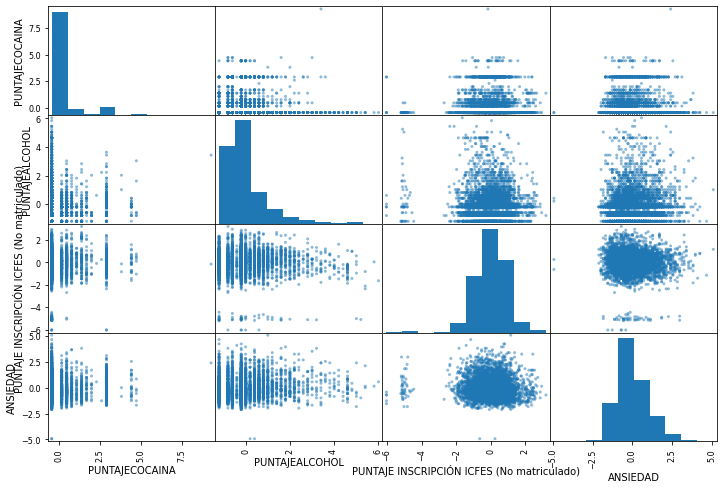

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["PUNTAJECOCAINA", "PUNTAJEALCOHOL", "PUNTAJE INSCRIPCIÓN ICFES (No matriculado)",
              "ANSIEDAD"]
scatter_matrix(Xtrain[attributes], figsize=(12, 8))

La columna de salida "etiqueta" es de nuestro interes, por ende, ordenamos los valores de Correlacion entre la salida y las demas variables

In [ ]:
corr_matrix["Etiqueta"].sort_values(ascending=False)

Etiqueta                                      1.000000
PUNTAJE INSCRIPCIÓN ICFES (No matriculado)    0.170648
estrategia_CONVERGENTE                        0.129919
CALIF_FAMILIAR                                0.067284
Periodo                                       0.048176
CALIF_PSICOSOCIAL                             0.018193
PUNTAJEOPIACEO                                0.008494
CALIF_ACADEMICA                               0.002375
ESTRATO                                       0.001769
DEPRESIÓN                                    -0.005498
VALOR PAGADO                                 -0.013593
ANSIEDAD                                     -0.020932
CALIF_ECONOMICO                              -0.024451
PUNTAJEALCOHOL                               -0.034893
estrategia_DIVERGENTE                        -0.047600
estrategia_ACOMODADOR                        -0.055656
NATURALEZA DE COLEGIO                        -0.068937
estrategia_ASIMILADOR                        -0.070609
PUNTAJEOTR

# Preparacion de los datos para entrenar sistema
Se debe eliminar primordialmente, la salida

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Se eliminan las etiquetas de salida
Xtrain=Xtrain.drop(['Etiqueta'], axis=1)
Xtest=Xtest.drop(['Etiqueta'], axis=1)

In [ ]:
print(f'en total quedan {Xtrain.shape[1]} parametros')

en total quedan 27 parametros


1    3458
0    1142
Name: Etiqueta, dtype: int64


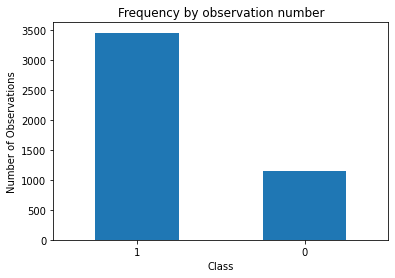

In [ ]:
print(ytrain.value_counts())
count_classes = pd.value_counts(ytrain, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");


Las etiquetas estan desequilibradas, por ende el modelo va tener problemas a la hora de predecir la etiqueta 0, es decir cuando no hay deserción. Para mitigar esto, se decidio penalizar la clase 1 y darle mas peso a la clase 0 al momento de entrenar

# Pesos sugeridos

In [ ]:
#Sugerencia para los pesos
from sklearn.utils import class_weight
class_w = class_weight.compute_class_weight('balanced',np.unique(ytrain),ytrain)
print(class_w)

[2.01401051 0.66512435]


Este valor es el sugerido de penalizacion para que las clases queden balanceadas, se debe dar mas peso a la clase 0 ya que lo que se busca es que el modelo sea un poco paranoico a la hora de predecir los desertores.

# Arquitectura de la red

La arquitecruta que se usara para el modelo de IA sera una red neuronal profunda con 3 capas ocultas, una sola entrada y una salida biclase.

Las capas tienen la siguiente distribucion de neuronas y activacion:

  * Capa h1: 200 neuronas y ativacion tipo tanh
  * Capa h2: 200 neuronas y activacion tipo tanh
  * Capa h3: 20 neuronas y activacion tipo tanh
  * Capa de salida: 1 neurona y activacion sigmoid

La cantidad de neuronas en las primeras capas es alta ya que se busca que la red sea capaz de ver, aprender e inventar las mejores caracteristicas y correlaciones entre los datos de entrada para su prediccion. La ultima capa oculta solo tiene 20 neuronas ya que busca generalizar las caracteristicas aprendidas por la red, y finalmente la capa de salida tiene una activacion tipo sigmoid y solo una neurona ya que el modelo solo debe predecir un 0 o un 1.


La activacion tipo tanh se uso para que la red tuviera un poco mas de libertad a la hora de ser entrenada, generaliczara mejor los datos que le ingresan y porque es la que no penalizaba los valores negativos, y su salida va de -1 a 1. La funcion de activacion tanh permite minimizar la funcion de costo mas rapido y está centrada en cero, lo que es muy conveniente para nuestros datos ya que en el preproceso el escalador centra los datos a una media de 0.

Para regularizar la red se uso regularizacion l1 y l2:

* La regularizacion l1 Lasso reduce el coeficiente de las caracterizticas menos importantes a 0 

* La regularizacion l2 Ridge se usa para cuando hay correlacion entre mas de dos atributos






Perdida con regularizacion L1
![alt text](https://miro.medium.com/max/646/1*1zCcVuEOPi64mjkkF6Uj7w@2x.png)

Perdida con regularizacion L2
![alt text](https://miro.medium.com/max/628/1*FfBxNNuFoCnzq8eEzPrRcw@2x.png)



Model: "outa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entradaA (InputLayer)        [(None, 27)]              0         
_________________________________________________________________
h1 (Dense)                   (None, 200)               5600      
_________________________________________________________________
h2 (Dense)                   (None, 200)               40200     
_________________________________________________________________
h3 (Dense)                   (None, 20)                4020      
_________________________________________________________________
biclase (Dense)              (None, 1)                 21        
Total params: 49,841
Trainable params: 49,841
Non-trainable params: 0
_________________________________________________________________


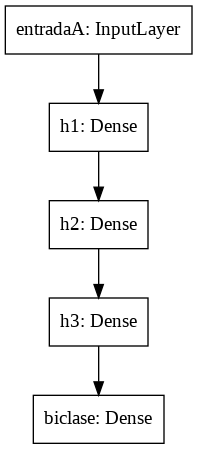

In [ ]:
import tensorflow as tf
tf.keras.backend.clear_session()

#Constantes para regularizacion
l1=0.0013
l2=1e-5

inputA = tf.keras.layers.Input(shape=(Xtrain.shape[1]), name='entradaA')
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(inputA)
h2 = tf.keras.layers.Dense(200,activation='tanh',name='h2',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(h1)
h3 = tf.keras.layers.Dense(20,activation='tanh',name='h3',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(h2)
#h4 = tf.keras.layers.Dense(20,activation='tanh',name='h4',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(h3)
outputA = tf.keras.layers.Dense(1,activation="sigmoid",name='biclase',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=l1,l2=l2))(h3)
model_fun = tf.keras.Model(inputs=inputA,outputs=outputA,name='outa')
model_fun.summary()
tf.keras.utils.plot_model(model_fun)

#Se usa activacion tanh, su salida va de -1 a 1

In [ ]:
model_fun.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.BinaryCrossentropy(), 
                  metrics='accuracy')

class_weight={0: 2,1: 0.5}

history = model_fun.fit(x=Xtrain, y=ytrain, 
                        epochs=50,batch_size=64,
                    validation_split=0.3,
                  class_weight=class_weight)

Epoch 1/50
51/51 [==============================] - 0s 8ms/step - loss: 3.8753 - accuracy: 0.5848 - val_loss: 3.1257 - val_accuracy: 0.5790
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 2.3213 - accuracy: 0.5767 - val_loss: 1.8447 - val_accuracy: 0.6203
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 1.3677 - accuracy: 0.6155 - val_loss: 1.2443 - val_accuracy: 0.5841
Epoch 4/50
51/51 [==============================] - 0s 4ms/step - loss: 0.9429 - accuracy: 0.5823 - val_loss: 0.9647 - val_accuracy: 0.5891
Epoch 5/50
51/51 [==============================] - 0s 4ms/step - loss: 0.7577 - accuracy: 0.5981 - val_loss: 0.8518 - val_accuracy: 0.5884
Epoch 6/50
51/51 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5913 - val_loss: 0.7776 - val_accuracy: 0.6188
Epoch 7/50
51/51 [==============================] - 0s 3ms/step - loss: 0.6313 - accuracy: 0.6047 - val_loss: 0.7520 - val_accuracy: 0.6087
Epoch 8/50
51/51 [==

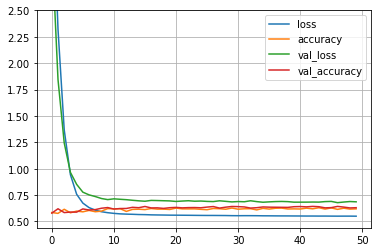

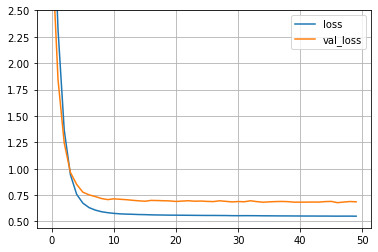

In [ ]:
hpd = pd.DataFrame(history.history)
hpd.plot()
plt.grid()
plt.gca().set_ylim(0.44, 2.5)
plt.show()
hpd[['loss','val_loss']].plot()
plt.gca().set_ylim(0.44, 2.5)
plt.grid()

# Validacion del entrenamiento de la red

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black")
    fig.tight_layout()
    return ax


(1150, 1)
[0. 1.]
              precision    recall  f1-score   support

           0       0.37      0.74      0.49       284
           1       0.87      0.59      0.70       866

    accuracy                           0.63      1150
   macro avg       0.62      0.66      0.60      1150
weighted avg       0.75      0.63      0.65      1150



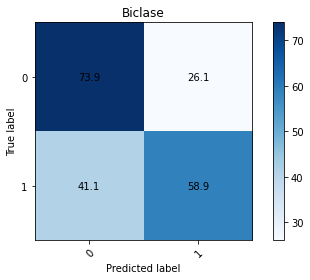

In [ ]:
ytest_e= model_fun.predict(Xtest)
print(ytest_e.shape)
print(np.unique(np.round(ytest_e)))
plot_confusion_matrix(ytest, np.round(ytest_e),classes=np.unique(ytest))
plt.title('Biclase')
print(classification_report(ytest, np.round(ytest_e)))

Es Paranoico para la clase 0, se observa en la matriz de confusion, que la red predice con baja precision la clase 0, pero tiende a ser muy sensible respecto a esa clase

# Prioridad de los pesos

Se observa la prioridad que le dio la red respecto a cada entrada sumando los pesos de la primera capa oculta h1


(27, 200)
(27,)


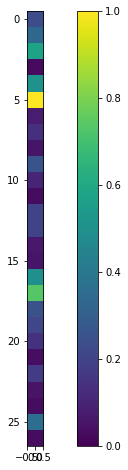

In [ ]:
print(model_fun.get_layer('h1').get_weights()[0].shape)
W1 = abs(model_fun.get_layer('h1').get_weights()[0]).sum(axis=1)
print(W1.shape)
Wc = np.c_[W1]
Wc /=np.max(Wc)
plt.figure(figsize=(12,8))
plt.imshow(Wc,vmin=0,vmax=1)
plt.colorbar()
plt.show()

La red neuronal en la primera capa, da prioridad a la caracteriztica 5 principalmente, la 3, 16 y 17, contando desde 0.
Se desea observar cuales son dichas caracterizticas:

In [ ]:
print(Xtrain.iloc[:, 5])
print(Xtrain.iloc[:, 3])
print(Xtrain.iloc[:,16])
print(Xtrain.iloc[:,17])

0      -1.151776
1       0.454960
2      -1.007581
3      -5.142866
4      -0.657395
          ...   
4595   -0.780990
4596   -1.275371
4597   -6.033781
4598   -0.060019
4599   -0.636796
Name: PUNTAJE INSCRIPCIÓN ICFES (No matriculado), Length: 4600, dtype: float64
0       0.012862
1       0.012862
2       1.150636
3      -1.124913
4       0.012862
          ...   
4595   -1.124913
4596    0.012862
4597    2.288410
4598    0.012862
4599    0.012862
Name: ESTRATO, Length: 4600, dtype: float64
0      -0.462330
1      -0.462330
2       2.889231
3      -0.462330
4      -0.462330
          ...   
4595   -0.462330
4596   -0.462330
4597   -0.462330
4598   -0.462330
4599   -0.462330
Name: PUNTAJECOCAINA, Length: 4600, dtype: float64
0       1.873620
1      -0.454864
2      -0.454864
3      -0.454864
4      -0.454864
          ...   
4595   -0.454864
4596    0.476529
4597    0.476529
4598    0.476529
4599    0.476529
Name: PUNTAJEANFETAMINA, Length: 4600, dtype: float64


Ya que el puntaje de inscripcion ifces es el aspecto que mas se tiene en cuenta, se observan de que factores depende: 
Principalmente del estrato, la naturaleza del colegio, y la calificacion familiar.
Otro aspecto que influye en el puntaje de inscripcion icfes es la edad: Entre mas joven es la persona, mayor es el puntaje de inscripcion y por ende tiene mas probabilidad de no retirarse de la universidad

In [ ]:
corr_matrix["PUNTAJE INSCRIPCIÓN ICFES (No matriculado)"].sort_values(ascending=False)

PUNTAJE INSCRIPCIÓN ICFES (No matriculado)    1.000000
Etiqueta                                      0.170648
ESTRATO                                       0.116621
NATURALEZA DE COLEGIO                         0.107581
CALIF_FAMILIAR                                0.106033
CALIF_ACADEMICA                               0.098154
SEXO                                          0.064929
CALIF_PSICOSOCIAL                             0.064049
estrategia_CONVERGENTE                        0.035571
PUNTAJEINHALANTE                              0.035254
PUNTAJECOCAINA                                0.013022
VALOR PAGADO                                  0.012570
PUNTAJEALUCINOGENO                            0.004608
estrategia_ASIMILADOR                         0.002759
Periodo                                       0.002715
PUNTAJEANFETAMINA                            -0.014653
DEPRESIÓN                                    -0.015894
estrategia_ACOMODADOR                        -0.015924
PUNTAJEOTR

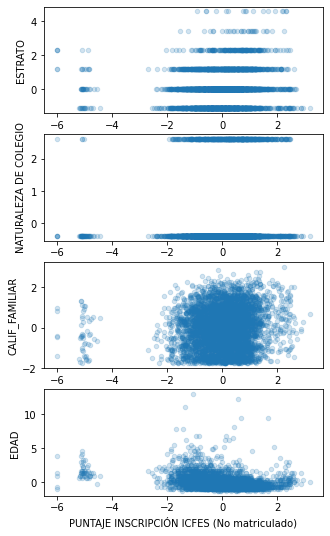

In [ ]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1,figsize=(5,9))

Xtrain.plot(kind="scatter", x="PUNTAJE INSCRIPCIÓN ICFES (No matriculado)", y="ESTRATO",
             alpha=0.2,ax=ax1)
Xtrain.plot(kind="scatter", x="PUNTAJE INSCRIPCIÓN ICFES (No matriculado)", y="NATURALEZA DE COLEGIO",
             alpha=0.2,ax=ax2)
Xtrain.plot(kind="scatter", x="PUNTAJE INSCRIPCIÓN ICFES (No matriculado)", y="CALIF_FAMILIAR",
             alpha=0.2,ax=ax3)
Xtrain.plot(kind="scatter", x="PUNTAJE INSCRIPCIÓN ICFES (No matriculado)", y="EDAD",
             alpha=0.2,ax=ax4)

In [ ]:
corr_matrix["PUNTAJECOCAINA"].sort_values(ascending=False)

PUNTAJECOCAINA                                1.000000
PUNTAJEANFETAMINA                             0.252116
PUNTAJEINHALANTE                              0.164648
PUNTAJEOTRADROGA                              0.090557
PUNTAJECANNABIS                               0.081598
estrategia_ASIMILADOR                         0.076573
estrategia_DIVERGENTE                         0.061870
estrategia_ACOMODADOR                         0.061560
SEXO                                          0.029612
PUNTAJETABACO                                 0.022565
PUNTAJESEDANTE                                0.014641
PUNTAJE INSCRIPCIÓN ICFES (No matriculado)    0.013022
ANSIEDAD                                      0.007022
DEPRESIÓN                                     0.005776
CALIF_FAMILIAR                               -0.006740
CALIF_PSICOSOCIAL                            -0.007269
EDAD                                         -0.008422
PUNTAJEOPIACEO                               -0.016738
CALIF_ECON

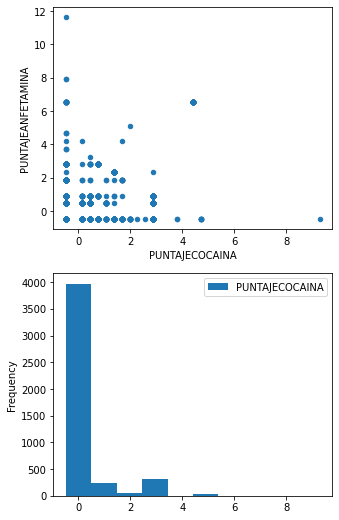

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(5,9))

Xtrain.plot(kind="scatter", x="PUNTAJECOCAINA", y="PUNTAJEANFETAMINA",ax=ax1)
Xtrain.plot(kind="hist", x="Periodo", y="PUNTAJECOCAINA",ax=ax2)